In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from final_processing import final_processing_functions as fpf
import pathlib
from matplotlib import pyplot as plt
import seaborn as sb
import warnings
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
from scipy.stats import ks_2samp
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from matplotlib import rcParams
import yaml
import figure_formatting as ff
# from matplotlib.ticker import FormatStrFormatter

import matplotlib
warnings.filterwarnings('ignore')
import final_processing.loading_functions as lf
import final_processing.MAPseq_data_processing as mdp
import statsmodels.formula.api as smf
import final_processing.fig2_plotting as pltt
import final_processing.helper_functions as hf
%matplotlib inline

/camp/home/turnerb/.conda/envs/MAPseq_processing/lib/python3.8/site-packages/flexiznam/schema/sequencing_data.py:11: UserWarning: Could not find `sequencing_extensions` in config. Please update config file
  class SequencingData(Dataset):
/camp/home/turnerb/.conda/envs/MAPseq_processing/lib/python3.8/site-packages/matplotlib/__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/camp/home/turnerb/.conda/envs/MAPseq_processing/lib/python3.8/site-packages/setuptools/_distutils/version.py:337: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/camp/home/turnerb/.conda/envs/MAPseq_processing/lib/python3.8/site-packages/matplotlib/__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/camp/home/turnerb/.conda/envs/

Load parameters and dataframes

In [2]:
gen_parameters = lf.load_gen_params()
mice = gen_parameters['MICE']
saving_path = gen_parameters['fig_saving_path']
proj_path = gen_parameters['proj_path']
ff.set_font_params(gen_parameters)


In [3]:
#load all mice neuron projection datasets
combined_dict = mdp.samples_to_areas(mice = mice, proj_path=proj_path)
all_mice_combined = pd.concat([
    combined_dict[k]['homogenous_across_cubelet'][mdp.get_common_columns(mice=mice, combined_dict=combined_dict, cortex=True)]
    for k in mice
])

Extended data fig. 3a

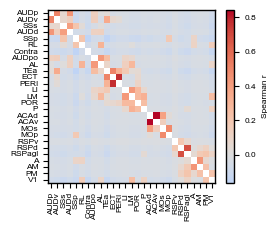

In [4]:
fig= plt.figure(figsize=(2.7, 2.25)) 
pltt.plot_corr_heatmap(gen_parameters=gen_parameters)
fig.savefig(f"{saving_path}/supplementary/extended_fig_3a.svg", format="svg")
fig.savefig(f"{saving_path}/supplementary/extended_fig_3a.pdf", format="pdf")

Extended data fig. 3b-d

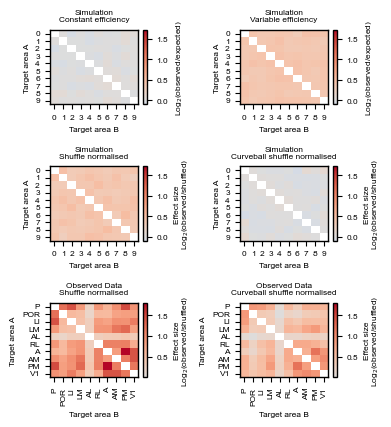

In [6]:
fig, axes = plt.subplots(3, 2,
                            figsize=(3.8, 4.2),  
                            constrained_layout=True)
axes = axes.flatten()
pltt.plot_all_sup_matrices(gen_parameters, all_mice_combined, axes, n_neurons=100000, n_areas=10)
fig.savefig(f"{saving_path}/supplementary/extended_fig_3bcd.svg", format="svg")
fig.savefig(f"{saving_path}/supplementary/extended_fig_3bcd.pdf", format="pdf")



Extended data fig. 3e

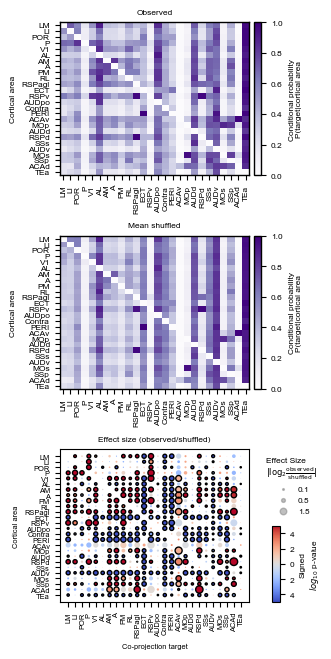

In [33]:
fig, axs = plt.subplots(3, 1, figsize=(3.2, 6.5), constrained_layout=True)
pltt.plot_supp_cond_prob_heatmaps(gen_parameters=gen_parameters, axs=axs, all_mice_combined=all_mice_combined)
fig.savefig(f"{saving_path}/supplementary/extended_fig_3e.svg", format="svg", bbox_inches='tight')
fig.savefig(f"{saving_path}/supplementary/extended_fig_3e.pdf", format="pdf", bbox_inches='tight')

